In [59]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

plotting = "Los Angeles"
san_diego_data = pd.read_csv('san_diego_listing_cleaned.csv')
los_angeles_data = pd.read_csv('los_angeles_listing_cleaned.csv')
san_diego_shapefile = "neighborhoods/sandiego.geojson"
los_angeles_shapefile = "neighborhoods/losangeles.geojson"

In [60]:
if plotting == "San Diego":
    shapefile_path = san_diego_shapefile
    gdf = gpd.read_file(shapefile_path)
    data = san_diego_data
elif plotting == "Los Angeles":
    shapefile_path = los_angeles_shapefile
    gdf = gpd.read_file(shapefile_path)
    data = los_angeles_data

In [61]:
gdf['neighbourhood']

0      Amphitheater And Water Park
1                       Bella Lago
2               Bonita Long Canyon
3                        East Lake
4                  Eastlake Trails
                  ...             
103                University City
104                  Valencia Park
105                        Webster
106        West University Heights
107                    Wooded Area
Name: neighbourhood, Length: 108, dtype: object

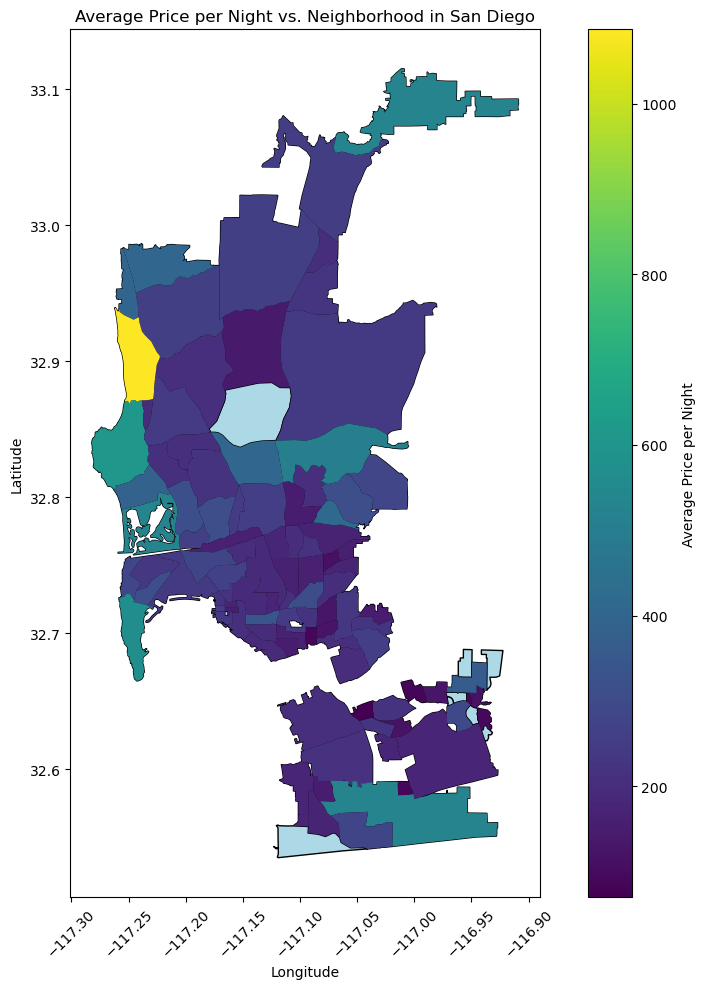

In [62]:
average_price_per_neighborhood = data.groupby('neighbourhood_cleansed')['price'].mean().sort_values()
# print(average_price_per_neighborhood)
# Plot the neighborhoods
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the average price per neighborhood
gdf['average_price'] = gdf['neighbourhood'].map(average_price_per_neighborhood)
gdf.plot(column='average_price', ax=ax, legend=True, legend_kwds={'label': "Average Price per Night"})

#rotate the x-axis labels
plt.xticks(rotation=45)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Price per Night vs. Neighborhood in {}'.format(plotting))
plt.tight_layout()
plt.savefig('plots/los_angeles_price_per_neighborhood.pdf')
